# QCTO - Workplace Module

### Project Title: Please Insert your Project Title Here
#### Done By: LINDOKUHLE MHLONGO

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

This study is based on an analysis and forecast of avocado prices in the United States from 2015 to 2024. The availability of clients is also governed by price fluctuations. Once more, at this stage, the economic crisis must be taken into account. Also, the research has produced data analysis that have been cleaned up. Pie conversations and bar graphs were among them. These are a variety of images to help the reader comprehend the investigation of avocado pricing in the United States. Three categories are used to classify avocados: extra-large bags, large bags, and small bags.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [20]:
#Importing Libraries for  Data loading, manipulation and analysis

import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

Our Dataset is about "Avocado Prices and Sales Volume 2015-2023 in USA", we got our data from https://www.kaggle.com,seems to be uploaded by user 'vakhariapujan',it is in a form of a csv file.And was last updated 4 Months Ago.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [21]:
Avo_df = pd.read_csv('\\Users\\lindo\\OneDrive\\Desktop\\Workplace_Lindo\\Avocado_HassAvocadoBoard_20152023v1.0.1.csv')

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [22]:
def check_null_values(Avo_df_copy):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    for column in Avo_df_copy:
        if Avo_df_copy[column].isnull().any():
            print('{0} has {1} null values'.format(column, Avo_df_copy[column].isnull().sum()))

In [24]:
Avo_df_copy = Avo_df.copy()

In [25]:
check_null_values(Avo_df_copy)

SmallBags has 12390 null values
LargeBags has 12390 null values
XLargeBags has 12390 null values


In [26]:
def count_duplicate_rows(Avo_df_copy):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df_copy (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = Avo_df_copy.duplicated().sum()
    return duplicate_count

In [27]:
count_duplicate_rows(Avo_df_copy)

0

In [28]:
print(f'Is there missing data in the columns?\n{Avo_df_copy.isna().any()}')

Is there missing data in the columns?
Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
SmallBags        True
LargeBags        True
XLargeBags       True
type            False
region          False
dtype: bool


In [29]:
# Identifying outliers based on IQR in 'AveragePrice' column
Q1 = Avo_df_copy['AveragePrice'].quantile(0.25)
Q3 = Avo_df_copy['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_price = (Avo_df_copy['AveragePrice'] < lower_bound) | (Avo_df_copy['AveragePrice'] > upper_bound)

# Print the number of outliers
print(f"Number of outliers in AveragePrice: {outliers_price.sum()}")

Number of outliers in AveragePrice: 358


In [30]:
# Identify rows with missing values
missing_rows = Avo_df_copy[Avo_df_copy[['SmallBags', 'LargeBags', 'XLargeBags']].isnull().any(axis=1)]

# Iterate over missing rows
for index, row in missing_rows.iterrows():
    # Fill missing values with their mean
    Avo_df_copy.at[index, 'SmallBags'] = Avo_df_copy['SmallBags'].mean()
    Avo_df_copy.at[index, 'LargeBags'] = Avo_df_copy['LargeBags'].mean()
    Avo_df_copy.at[index, 'XLargeBags'] = Avo_df_copy['XLargeBags'].mean()

# Verify that there are no more missing values
print(Avo_df_copy[['TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']].isnull().sum())

TotalBags     0
SmallBags     0
LargeBags     0
XLargeBags    0
dtype: int64


In [31]:
print(f'Is there missing data in the columns?\n{Avo_df_copy.isna().any()}')

Is there missing data in the columns?
Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
SmallBags       False
LargeBags       False
XLargeBags      False
type            False
region          False
dtype: bool


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [32]:
# Summary statistics
Avo_df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,53415.0,1.428910,3.931160e-01,0.44,1.119091,1.40,1.690000,3.440830e+00
TotalVolume,53415.0,869447.441374,3.545274e+06,84.56,16264.655000,120352.46,454238.015000,6.103446e+07
plu4046,53415.0,298270.749448,1.307669e+06,0.00,694.725000,14580.58,128792.380000,2.544720e+07
plu4225,53415.0,222217.037654,9.554624e+05,0.00,2120.800000,17516.63,93515.600000,2.047057e+07
plu4770,53415.0,20531.954686,1.040977e+05,0.00,0.000000,90.05,3599.735000,2.860025e+06
TotalBags,53415.0,217508.289491,8.676947e+05,0.00,7846.520000,36953.10,111014.610000,1.629830e+07
SmallBags,53415.0,103922.170677,4.988876e+05,0.00,0.000000,11462.79,103922.170677,1.256716e+07
LargeBags,53415.0,23313.164066,1.311607e+05,0.00,0.000000,505.47,23313.164066,4.324231e+06
XLargeBags,53415.0,2731.811796,1.979659e+04,0.00,0.000000,0.00,2731.811796,6.795868e+05


In [33]:
# Get the count of each type in the dataset
type_count = Avo_df_copy['type'].value_counts()

# Display the top 5 most common types
type_count.head()

type
conventional    26709
organic         26706
Name: count, dtype: int64

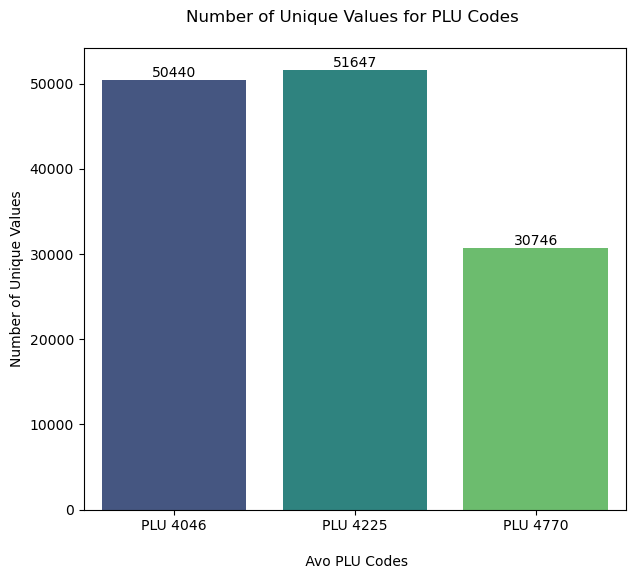

In [34]:
# Number of unique values for each PLU code
unique_counts = [Avo_df_copy['plu4046'].nunique(), Avo_df_copy['plu4225'].nunique(), Avo_df_copy['plu4770'].nunique()]
plu_codes = ['PLU 4046', 'PLU 4225','PLU 4770']

# Bar plot
plt.figure(figsize=(7, 6))
barplot = sns.barplot(x=plu_codes, y=unique_counts, palette='viridis')
plt.title('Number of Unique Values for PLU Codes \n')
plt.xlabel('\n Avo PLU Codes')
plt.ylabel('Number of Unique Values')

# Add data values on top of the bars
for i, count in enumerate(unique_counts):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

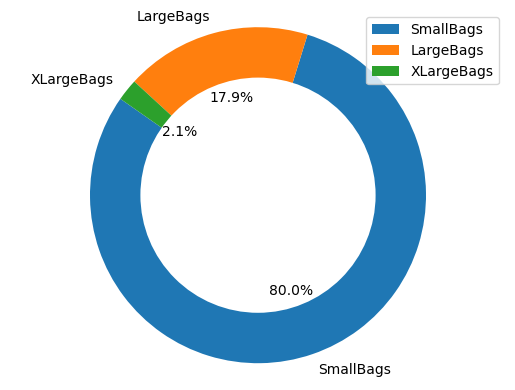

In [36]:
# Calculate the sum of each bag type across all rows
total_small_bags = Avo_df_copy['SmallBags'].sum()
total_large_bags = Avo_df_copy['LargeBags'].sum()
total_xlarge_bags = Avo_df_copy['XLargeBags'].sum()

# Create data for the pie plot
sizes = [total_small_bags, total_large_bags, total_xlarge_bags]
labels = ['SmallBags', 'LargeBags', 'XLargeBags']
colors = ['Yellow', 'blue', 'lightgreen']

plt.pie(sizes , labels=labels, autopct='%1.1f%%', startangle=145)

# Next, we create a circle at the centre of the base plot.
centre_circle = plt.Circle((0,0),0.70, fc='white',linewidth=1.0)
fig = plt.gcf() # <-- Matplotlib command to get the current figure for further manipulation. 
# Add the circle to our base pie chart.
fig.gca().add_artist(centre_circle)
# Plot the pie chart
plt.legend(loc="best")
plt.axis('equal')
plt.show()

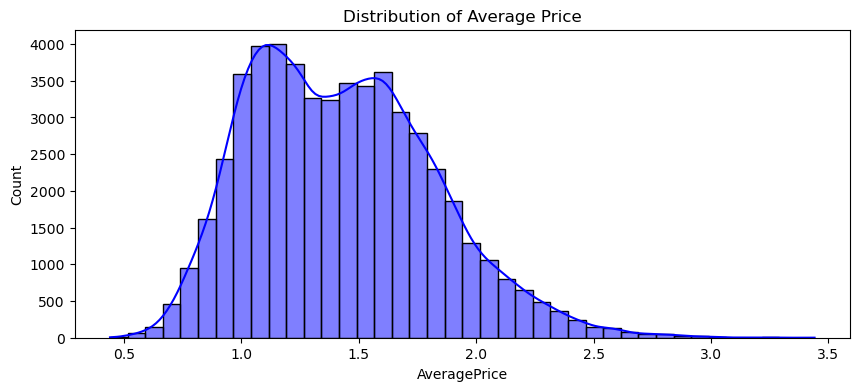

In [37]:
# Visualize the distribution of AveragePrice
plt.figure(figsize=(10, 4))
sns.histplot(Avo_df_copy['AveragePrice'], bins=40, kde=True, color='blue')
plt.title('Distribution of Average Price')
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
